In [5]:
"""
IBM Deep Learning (IDE) Generated Code.
Compatible Keras Version : 2.1
Tested on Python Version : 3.6.3
"""

# Import all dependencies
import os
import numpy as np
import keras
from keras.models import Model
import keras.backend as K
import keras.regularizers as R
import keras.constraints as C
from keras.layers import *
from keras.optimizers import *
import keras_helper as helper
from keras.callbacks import TensorBoard

# Perform data pre-processing
defined_metrics = []
batch_size = 128
num_epochs = 1

ImageData_3_params = {
    "train_dataset": "C:/Users/Lenovo/Downloads/MNIST-pkl/mnist-keras-train.pkl",
    "val_dataset": "C:/Users/Lenovo/Downloads/MNIST-pkl/mnist-keras-valid.pkl",
    "test_dataset": "C:/Users/Lenovo/Downloads/MNIST-pkl/mnist-keras-test.pkl",
    "validation_split": 0.1,
    "test_split": 0.1,
    "rows": 28,
    "cols": 28,
    "dim_ordering": "channels_last",
    "dbformat": "Python Pickle",
    "num_classes": 10
}
ImageData_3_data = helper.image_data_handler(ImageData_3_params)
train_x = ImageData_3_data["train_x"]
train_y = ImageData_3_data["train_y"]
val_x = ImageData_3_data["val_x"]
val_y = ImageData_3_data["val_y"]
test_x = ImageData_3_data["test_x"]
test_y = ImageData_3_data["test_y"]
labels = ImageData_3_data["labels"]
ImageData_3_shape = train_x.shape[1:]

# Define network architecture
ImageData_3 = Input(shape=ImageData_3_shape)
Convolution2D_9 = Conv2D(
    64, (3, 3),
    data_format="channels_last",
    strides=(1, 1),
    padding="valid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="glorot_uniform",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)(ImageData_3)
ReLU_8 = Activation("relu")(Convolution2D_9)
Pooling2D_7 = MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding="valid",
    data_format="channels_last")(ReLU_8)
Flatten_1 = Flatten()(Pooling2D_7)
Dense_2 = Dense(
    10,
    use_bias=False,
    kernel_initializer="glorot_uniform",
    bias_initializer="glorot_uniform",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)(Flatten_1)
Softmax_4 = Activation("softmax")(Dense_2)
defined_metrics.append("accuracy")
defined_loss = "categorical_crossentropy"

model_inputs = [ImageData_3]
model_outputs = [Softmax_4]
model = Model(inputs=model_inputs, outputs=model_outputs)

# Define optimizer
learning_rate = 0.001000
momentum = 0.100000
decay = 0.100000
nesterov = False
optim = SGD(
    lr=learning_rate, momentum=momentum, decay=decay, nesterov=nesterov)

# Perform training and other misc. final steps
model.compile(loss=defined_loss, optimizer=optim, metrics=defined_metrics)
if len(model_outputs) > 1:
    train_y = [train_y] * len(model_outputs)
    if len(val_x) > 0: val_y = [val_y] * len(model_outputs)
    if len(test_x) > 0: test_y = [test_y] * len(model_outputs)
#writing metrics
job_state_dir = os.environ.get('JOB_STATE_DIR')
static_path = os.path.join("logs", "tb", "test")
if job_state_dir is not None:
    tb_directory = os.path.join(job_state_dir, static_path)
else:
    tb_directory = static_path
tensorboard = TensorBoard(log_dir=tb_directory)
if (len(val_x) > 0):
    model.fit(
        train_x,
        train_y,
        batch_size=batch_size,
        epochs=num_epochs,
        verbose=1,
        validation_data=(val_x, val_y),
        shuffle=True,
        callbacks=[tensorboard])
else:
    model.fit(
        train_x,
        train_y,
        batch_size=batch_size,
        epochs=num_epochs,
        verbose=1,
        shuffle=True,
        callbacks=[tensorboard])
if (len(test_x) > 0):
    test_scores = model.evaluate(test_x, test_y, verbose=1)
    print(test_scores)
if "model_result_path" not in locals() \
 and "model_result_path" not in globals():
    model_result_path = "./keras_model.hdf5"
model.save(model_result_path)
print("Model saved in file: %s" % model_result_path)


Training data shape: (50040, 28, 28, 1)
Validation data shape: (9960, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Train on 50040 samples, validate on 9960 samples
Epoch 1/1
10000/10000 [==============================] - 2s 231us/step
[8.074626425170898, 0.4886]
Model saved in file: ./keras_model.hdf5


In [ ]:
train_x[0:1]

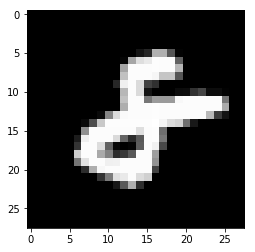

In [8]:
import matplotlib.pyplot as plt
X = train_x[1]
X1 = X.reshape(28, 28)
plt.gray()
plt.imshow(X1)
plt.show()

In [12]:
train_y[25:26]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model.predict(train_x[25:26])

array([[2.6850688e-09, 2.7697198e-21, 1.4492397e-25, 1.0000000e+00,
        1.2753754e-22, 1.9027411e-37, 9.7649971e-31, 1.4037213e-22,
        3.8020020e-33, 3.8388199e-23]], dtype=float32)